In [83]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

   row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0          1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1          2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
2          3  118     0.08  3.48      32.28  Present     52    29.14     3.81   
3          4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4          5  134    13.60  3.50      27.78  Present     60    25.99    57.34   

   age  chd  
0   52    1  
1   63    1  
2   46    0  
3   58    1  
4   49    1  


Percentage of each class:
chd
0    65.367965
1    34.632035
Name: proportion, dtype: float64

Missing values in each column:
row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

Categorical variables:
Index(['famhist'], dtype='object')


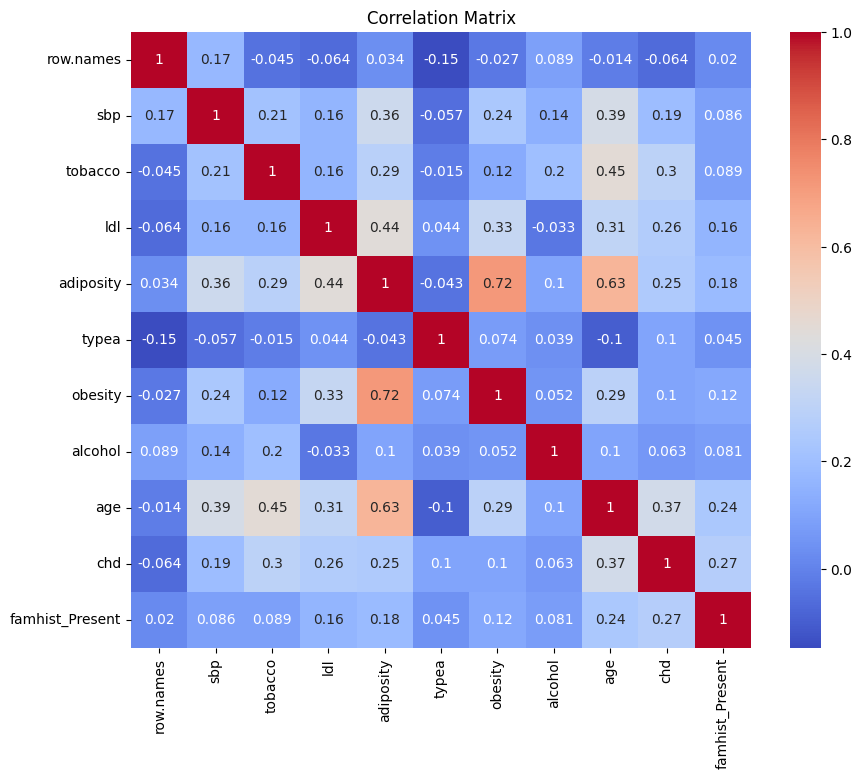

In [84]:
# EDA
# 1. Percentage of each class
class_counts = data['chd'].value_counts(normalize=True) * 100
print("Percentage of each class:")
print(class_counts)

# 2. Missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# 3. Categorical variables
categorical_vars = data.select_dtypes(include=['object']).columns
print("\nCategorical variables:")
print(categorical_vars)

# 4. One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# 5. Correlation matrix (using only numerical columns)
corr_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [85]:
# Preprocessing
# One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# Standardization
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

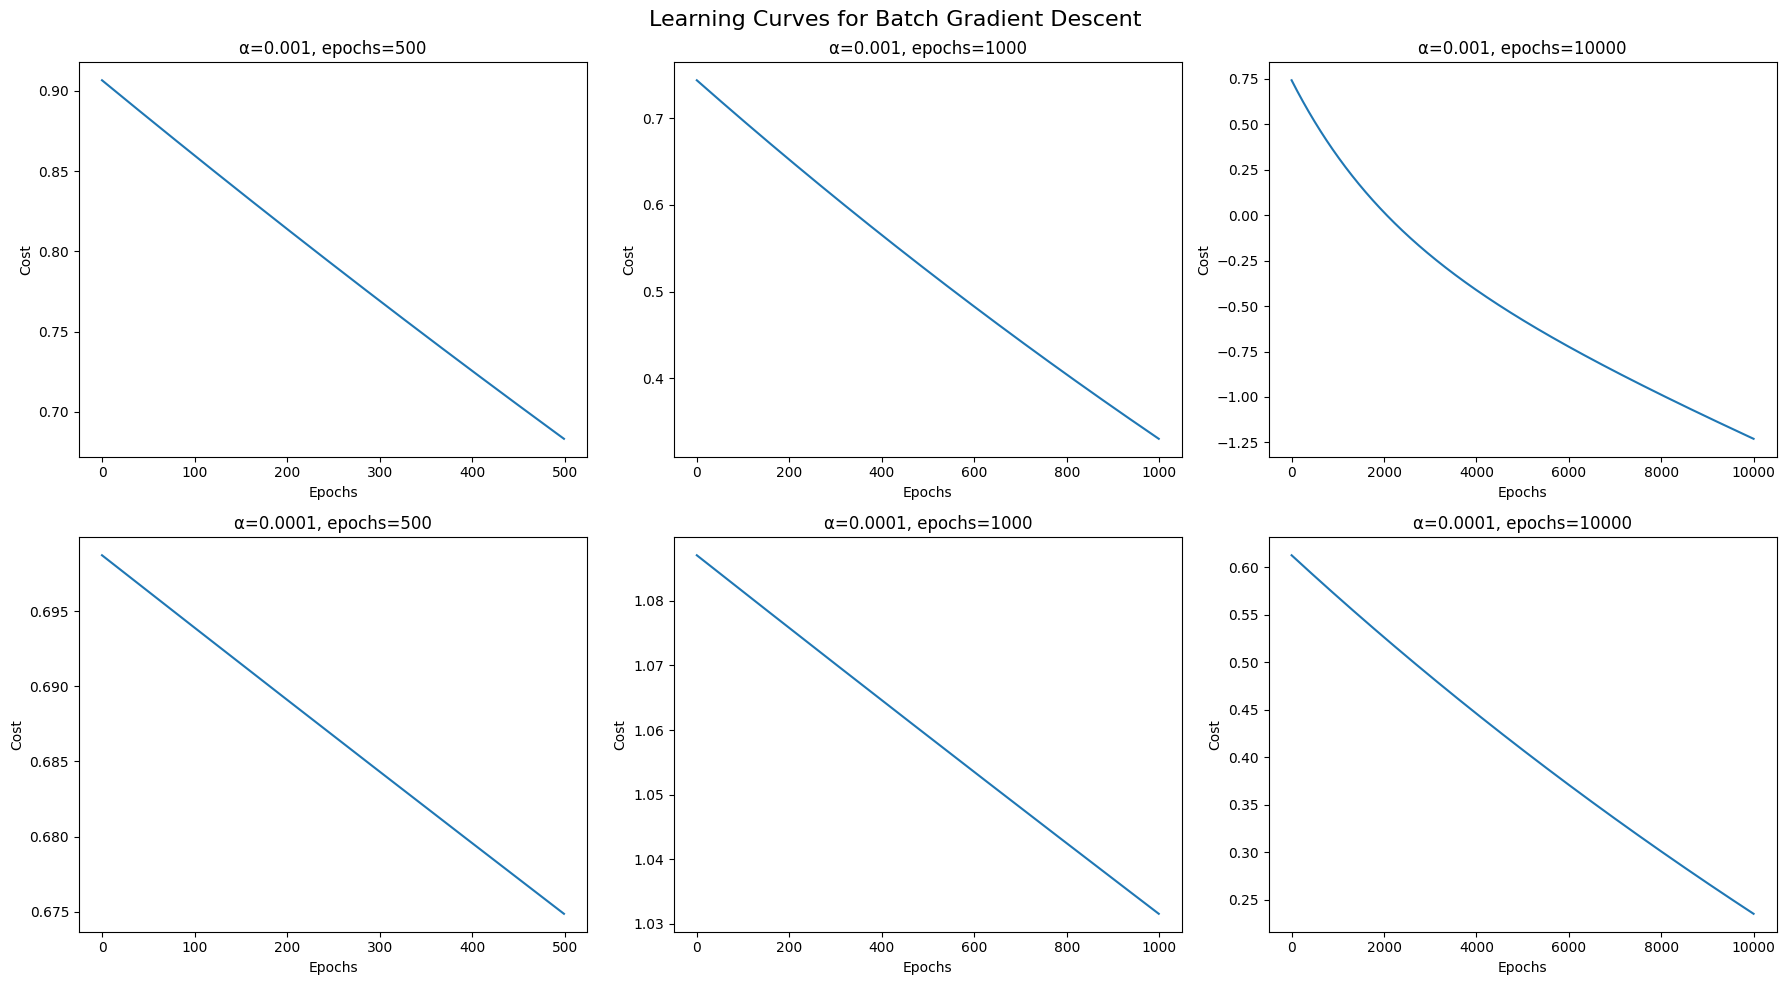

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    z = np.array(z, dtype=np.float64)
    return 1 / (1 + np.exp(-z))

# Define cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -(1/m) * np.sum(y * np.log(h + 1e-10) + (1 - y) * np.log(1 - h + 1e-10))  # Added 1e-10 to avoid log(0)
    return cost

# Batch Gradient Descent
def batch_gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = []
    for i in range(epochs):
        h = sigmoid(X.dot(theta))
        gradient = X.T.dot(h - y) / m
        gradient = np.array(gradient, dtype=np.float64)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Initialize parameters
np.random.seed(10)
theta = np.random.rand(data.shape[1] - 1)  # Exclude the target variable

# Prepare data for training
X = data.drop('chd', axis=1).values
y = data['chd'].values

# Add intercept term to X
X = np.c_[np.ones(X.shape[0]), X]

# Ensure X and y are float64
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

# Learning rates and epochs
learning_rates = [0.001, 0.0001]
epochs_list = [500, 1000, 10000]

# Create 6 separate graphs
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns for 6 graphs
fig.suptitle('Learning Curves for Batch Gradient Descent', fontsize=16)

# Loop through learning rates and epochs to plot 6 graphs
for i, alpha in enumerate(learning_rates):
    for j, epochs in enumerate(epochs_list):
        # Initialize theta for each run
        theta_initial = np.random.rand(X.shape[1])
        theta_initial = np.array(theta_initial, dtype=np.float64)

        # Run batch gradient descent
        theta_final, cost_history = batch_gradient_descent(X, y, theta_initial, alpha, epochs)

        # Plot the cost history
        ax = axes[i, j]
        ax.plot(range(epochs), cost_history)
        ax.set_title(f'α={alpha}, epochs={epochs}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Cost')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Based on the learning curves, the optimal stopping point for training depends on the learning rate. For α = 0.001, the cost function continues to decrease significantly up to ~5000 epochs, after which further training provides minimal improvements. For α = 0.0001, the cost reduction remains steady but starts to flatten around ~8000 epochs, suggesting that additional training beyond this point is unnecessary. Training beyond these epochs would result in wasted computation without meaningful gains in performance. Therefore, stopping at 5000 epochs for α = 0.001 and 8000 epochs for α = 0.0001 is a reasonable choice for efficiency and effectiveness.

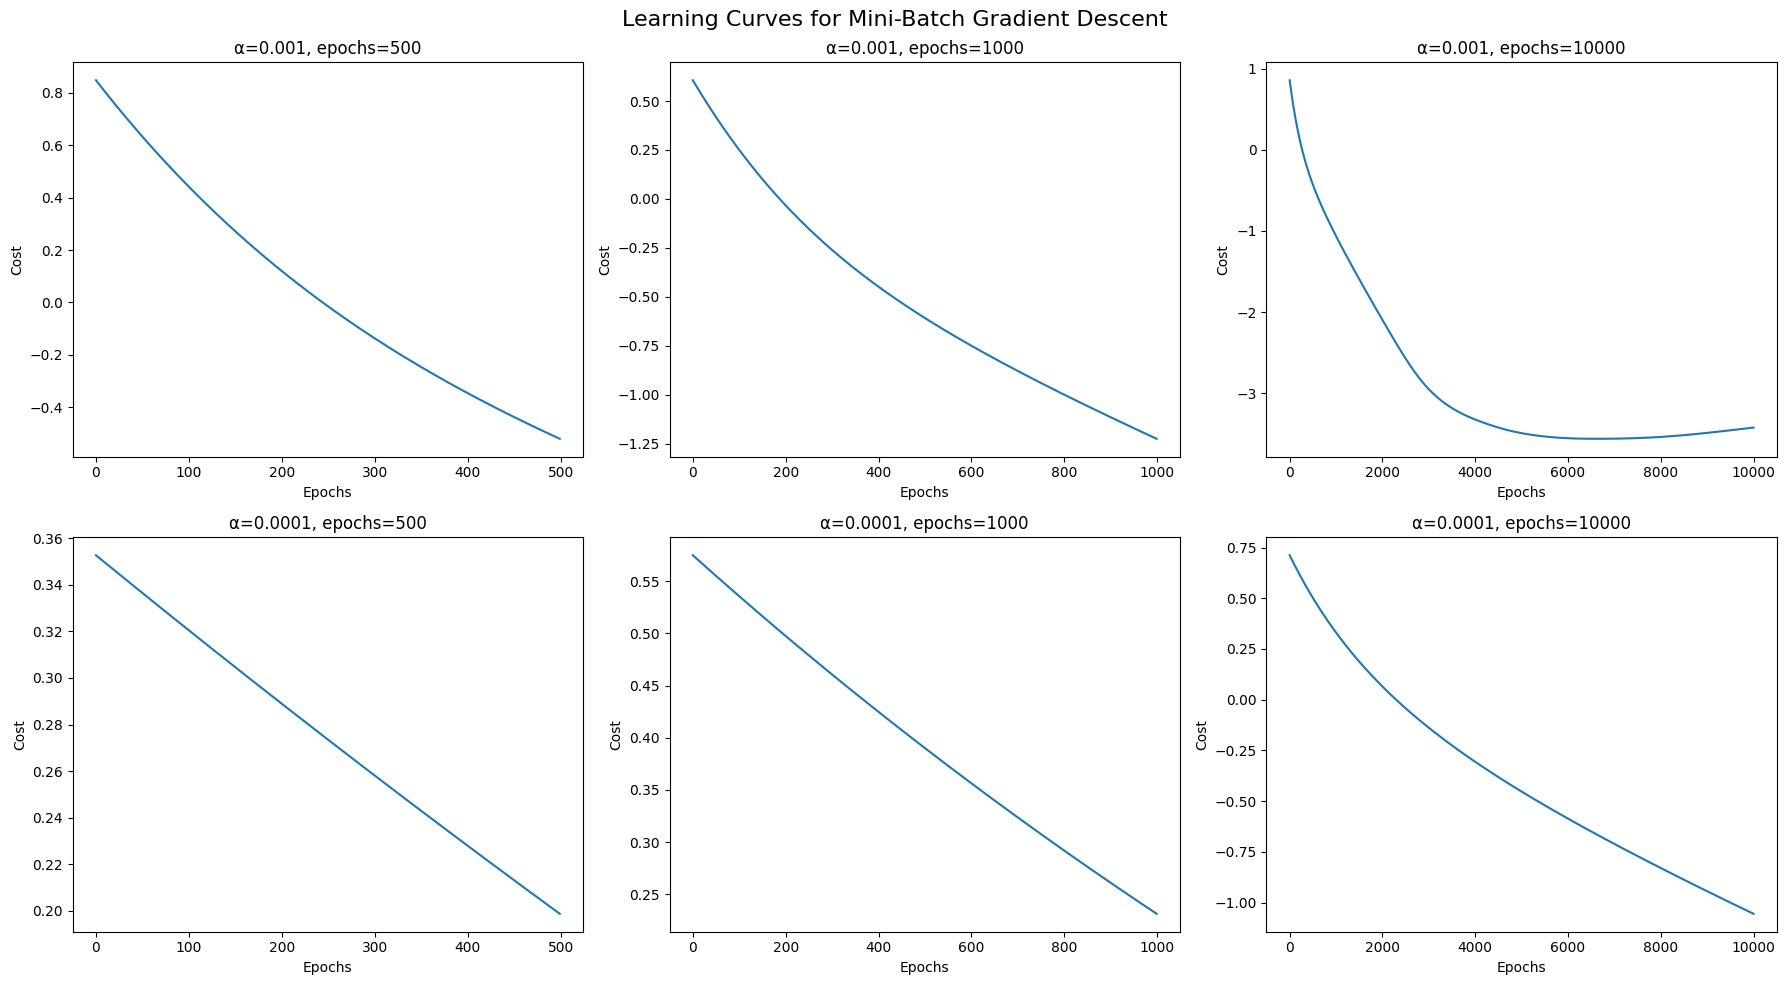

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    z = np.array(z, dtype=np.float64)
    return 1 / (1 + np.exp(-z))

# Define cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -(1/m) * np.sum(y * np.log(h + 1e-10) + (1 - y) * np.log(1 - h + 1e-10))  # Added 1e-10 to avoid log(0)
    return cost

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, alpha, epochs, batch_size):
    m = len(y)
    cost_history = []
    for i in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            h = sigmoid(X_batch.dot(theta))
            gradient = X_batch.T.dot(h - y_batch) / batch_size
            theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Initialize parameters
np.random.seed(10)
theta = np.random.rand(data.shape[1] - 1)  # Exclude the target variable

# Prepare data for training
X = data.drop('chd', axis=1).values
y = data['chd'].values

# Add intercept term to X
X = np.c_[np.ones(X.shape[0]), X]

# Ensure X and y are float64
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

# Learning rates and epochs
learning_rates = [0.001, 0.0001]
epochs_list = [500, 1000, 10000]

# Set batch size
batch_size = 50

# Create 6 separate graphs
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns for 6 graphs
fig.suptitle('Learning Curves for Mini-Batch Gradient Descent', fontsize=16)

# Loop through learning rates and epochs to plot 6 graphs
for i, alpha in enumerate(learning_rates):
    for j, epochs in enumerate(epochs_list):
        # Initialize theta for each run
        theta_initial = np.random.rand(X.shape[1])
        theta_initial = np.array(theta_initial, dtype=np.float64)

        # Run mini-batch gradient descent
        theta_final, cost_history = mini_batch_gradient_descent(X, y, theta_initial, alpha, epochs, batch_size)

        # Plot the cost history
        ax = axes[i, j]
        ax.plot(range(epochs), cost_history)
        ax.set_title(f'α={alpha}, epochs={epochs}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Cost')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Based on the learning curves for Mini-Batch Gradient Descent, the optimal stopping points can be estimated by observing when the cost function flattens. For α = 0.001, the cost continues to decrease steadily up to ~5000 epochs, but after that, the decrease is minimal, and beyond 6000 epochs, the curve starts to slightly rise, indicating potential overfitting. Thus, 5000–6000 epochs seems optimal. For α = 0.0001, the cost function decreases more gradually and flattens around 8000–9000 epochs, suggesting that additional training beyond 9000 epochs is unnecessary. Therefore, 5000 epochs for α = 0.001 and 9000 epochs for α = 0.0001 are reasonable stopping points to balance efficiency and performance.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train and y_test are integers (discrete class labels)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Debug: Check unique values and type of y_train
print("Unique values in y_train:", np.unique(y_train))
print("Data type of y_train:", y_train.dtype)

# Train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of sklearn's LogisticRegression: {accuracy:.2f}")

# Compare coefficients
print("\nCoefficients from our implementation:")
print(theta_final)
print("\nCoefficients from sklearn's LogisticRegression:")
print(model.coef_)

Unique values in y_train: [0 1]
Data type of y_train: int64
Accuracy of sklearn's LogisticRegression: 0.77

Coefficients from our implementation:
[-2.82243878 -0.21643185  0.58660916  1.27287147  1.20924201  0.52947998
  0.76378711  0.12009182  0.20980598  1.66773067 -0.06364062]

Coefficients from sklearn's LogisticRegression:
[[-0.00462749 -0.01530948  0.16689999  0.25535901  0.34129389  0.2054316
   0.38858183 -0.33009711  0.04788106  0.67508445  0.76870981]]
